# Defaults By Income in org 5

datawork.mk_critical_info - hb2_nmi, /tuca/scores/00093
datawork.mk_application_more - mk_TU_risk_Oct2022_score

#### A failure to meet the legal obligations of a loan, which means the borrower has missed payments or has otherwise failed to fulfill the loan agreement. ['isFPD = 0' no default on first payment; 'isFPD = 1' default on first payment, 'isFPD = 2' exception case which we want to exclude from the analysis]

Trends of defaults by income (nmi HB2) in FORA (org 5), measure against scores. 

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt 
import pymysql
import numpy as np
from time import perf_counter
import time
import helper_functions as hf

In [8]:
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
limit = 2627345182 ## 2024-05-17
difference = 200000
lower = 2561893664 ## 2023-08-02
upper = lower+difference

i=0
timestart = time.time()
while lower <= limit:
    time0=time.time()
    temp = pd.read_sql("""
    SELECT lead_sequence_id, organization_id, insert_date, decision, rule_description, lead_source_id
    FROM datawork.mk_application
    WHERE lead_sequence_id > """ + str(lower) + """
    AND lead_sequence_id <= """ + str(upper) + """
    AND organization_id in (5)
    AND decision = 'ACCEPT'
    """, con=conn)
    
    lower = lower + difference
    upper = upper + difference
    
    if i==0:
        leads_a = temp.copy()
    else:
        leads_a = pd.concat([leads_a, temp], ignore_index=True)
    i+=1    
    print(time.time()-time0)
    print(df_uw_cost.shape)
    print("lower:",lower)
    
conn.close()

print('total time: ', time.time()-timestart)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/2667028753.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""


3.000291109085083
(165, 6)
lower: 2562093664
2.8715691566467285
(165, 6)
lower: 2562293664
2.965388059616089
(165, 6)
lower: 2562493664
2.8523921966552734
(165, 6)
lower: 2562693664
2.8801960945129395
(165, 6)
lower: 2562893664
2.7584187984466553
(165, 6)
lower: 2563093664
2.7981581687927246
(165, 6)
lower: 2563293664
2.8705949783325195
(165, 6)
lower: 2563493664
2.222738027572632
(165, 6)
lower: 2563693664
2.084584951400757
(165, 6)
lower: 2563893664
2.124912738800049
(165, 6)
lower: 2564093664
2.1199827194213867
(165, 6)
lower: 2564293664
2.173387050628662
(165, 6)
lower: 2564493664
2.0831868648529053
(165, 6)
lower: 2564693664
1.8105900287628174
(165, 6)
lower: 2564893664
1.8403019905090332
(165, 6)
lower: 2565093664
1.8432326316833496
(165, 6)
lower: 2565293664
1.8513760566711426
(165, 6)
lower: 2565493664
1.7738628387451172
(165, 6)
lower: 2565693664
1.798896074295044
(165, 6)
lower: 2565893664
1.8458659648895264
(165, 6)
lower: 2566093664
1.7753541469573975
(165, 6)
lower: 256629

6.60824990272522
(165, 6)
lower: 2598493664
6.604053974151611
(165, 6)
lower: 2598693664
6.7613279819488525
(165, 6)
lower: 2598893664
7.181301116943359
(165, 6)
lower: 2599093664
7.0693628787994385
(165, 6)
lower: 2599293664
6.943104982376099
(165, 6)
lower: 2599493664
7.27266263961792
(165, 6)
lower: 2599693664
7.1616740226745605
(165, 6)
lower: 2599893664
6.559598207473755
(165, 6)
lower: 2600093664
6.656903028488159
(165, 6)
lower: 2600293664
6.9578869342803955
(165, 6)
lower: 2600493664
7.680462837219238
(165, 6)
lower: 2600693664
7.021760940551758
(165, 6)
lower: 2600893664
7.107802152633667
(165, 6)
lower: 2601093664
7.334849834442139
(165, 6)
lower: 2601293664
8.848246812820435
(165, 6)
lower: 2601493664
6.755512952804565
(165, 6)
lower: 2601693664
7.276504993438721
(165, 6)
lower: 2601893664
6.671635150909424
(165, 6)
lower: 2602093664
6.941497802734375
(165, 6)
lower: 2602293664
6.970606803894043
(165, 6)
lower: 2602493664
7.675894021987915
(165, 6)
lower: 2602693664
6.857902

In [9]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT lead_sequence_id, mk_TU_risk_Oct2022_score as TUrs
    FROM datawork.mk_application_more 
    WHERE lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        TUrs_df = temp.copy()
    else:
        TUrs_df = pd.concat([TUrs_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/1070603417.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


1.1318697929382324
0
(372, 2)
0.7162690162658691
1
(372, 2)
0.6685991287231445
2
(372, 2)
0.666215181350708
3
(372, 2)
0.6175601482391357
4
(372, 2)
0.7131049633026123
5
(372, 2)
0.7175281047821045
6
(372, 2)
0.7103440761566162
7
(372, 2)
0.5124039649963379
8
(372, 2)
0.3289179801940918
9
(372, 2)
0.31543803215026855
10
(372, 2)
0.31798601150512695
11
(372, 2)
0.32362818717956543
12
(372, 2)
0.3209049701690674
13
(372, 2)
0.31928181648254395
14
(372, 2)
0.3158080577850342
15
(372, 2)
0.31920313835144043
16
(372, 2)
0.3184940814971924
17
(372, 2)
0.31766605377197266
18
(372, 2)
0.31339502334594727
19
(372, 2)
0.3086230754852295
20
(372, 2)
0.31310606002807617
21
(372, 2)
0.3079979419708252
22
(372, 2)
0.31053590774536133
23
(372, 2)
0.31124401092529297
24
(372, 2)
0.31249117851257324
25
(372, 2)
0.3094019889831543
26
(372, 2)
0.30716586112976074
27
(372, 2)
0.310039758682251
28
(372, 2)
0.3024270534515381
29
(372, 2)
0.3123137950897217
30
(372, 2)
0.31240177154541016
31
(372, 2)
0.30380

In [11]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT lead_sequence_id, hb2_nmi, `/tuca/scores/00093` as bureau_score
    FROM datawork.mk_critical_info
    WHERE lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        nmi_df = temp.copy()
    else:
        nmi_df = pd.concat([nmi_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.22596192359924316
0
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.22333216667175293
1
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.22447586059570312
2
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.22687983512878418
3
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.22757601737976074
4
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.2221999168395996
5
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.22046685218811035
6
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.41841721534729004
7
(136, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_48064/3441653524.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nmi_df = pd.concat([nmi_df, temp], ignore_index=True)


0.7589712142944336
8
(372, 3)
0.7696409225463867
9
(372, 3)
0.7238070964813232
10
(372, 3)
0.8101041316986084
11
(372, 3)
0.8251867294311523
12
(372, 3)
0.7446489334106445
13
(372, 3)
0.789085865020752
14
(372, 3)
0.7253539562225342
15
(372, 3)
0.8086979389190674
16
(372, 3)
0.8290479183197021
17
(372, 3)
0.8568921089172363
18
(372, 3)
0.7808809280395508
19
(359, 3)
0.8237869739532471
20
(372, 3)
0.7948331832885742
21
(372, 3)
0.8150660991668701
22
(372, 3)
0.8247082233428955
23
(372, 3)
0.8020358085632324
24
(372, 3)
0.78450608253479
25
(372, 3)
0.8366360664367676
26
(372, 3)
0.7418041229248047
27
(372, 3)
0.7546291351318359
28
(372, 3)
0.8005392551422119
29
(372, 3)
0.7896931171417236
30
(372, 3)
0.7550411224365234
31
(372, 3)
0.7207973003387451
32
(372, 3)
0.7819299697875977
33
(372, 3)
0.8075752258300781
34
(372, 3)
0.8301517963409424
35
(372, 3)
0.8096036911010742
36
(372, 3)
0.8551819324493408
37
(372, 3)
0.7789230346679688
38
(372, 3)
0.9248969554901123
39
(372, 3)
0.91537308692

In [12]:
leads_more = pd.merge(left=leads_a, right=TUrs_df, on='lead_sequence_id', how='left')
leads_more = pd.merge(left=leads_more, right=nmi_df, on='lead_sequence_id', how='left')
leads_more.shape

(18604, 9)

In [15]:
fpd_df = hf.get_more_fpd(leads_a)

We will excecute 1 iterations:



/Users/ethan.tait/Library/CloudStorage/OneDrive-PropelHoldingsInc/helper_functions.py:405: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_payments =  pd.read_sql("""


Query successful
exceptions count:  1
Runtime:  1.6513671875


/Users/ethan.tait/Library/CloudStorage/OneDrive-PropelHoldingsInc/helper_functions.py:405: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_payments =  pd.read_sql("""


Query successful
exceptions count:  37
Runtime:  1.1703259944915771


drop all exceptions => drop all when isFPD = 2

In [16]:
fpd_df = fpd_df[fpd_df['isFPD'] != 2]

In [17]:
fpd_df.head()

,lead_sequence_id,item_date,payment_schedule_id,status,payment_mode,total_amount,payment_sequence,customer_id,base_loan_id,isFPD
0,2561896639,2023-08-25,6917311,cleared,ach,37.73,1,4119923,5536113,0
1,2561906917,2023-08-24,6914856,cleared,ach,40.55,1,4120157,5536400,0
2,2561929488,2023-08-24,6915389,cleared,ach,21.42,1,4120494,5536834,0
3,2562004726,2023-08-31,6917083,cleared,ach,63.23,1,4121503,5538096,0
4,2562034383,2023-08-18,6918475,cleared,ach,14.10,1,4121959,5538647,0


In [36]:
final_df = pd.merge(left=leads_more, right=fpd_df, on='lead_sequence_id', how='left')
final_df.shape

(18764, 18)

In [51]:
def create_decile_buckets(df, score_column, nmi_column, fpd_column):
    df['decile'] = pd.qcut(df[score_column], 10, labels=False) + 1
    # use pivot to restructure df so that default and non default counts means and stds are in separate columns
    income_stats = df.groupby(['decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='decile', columns=fpd_column, values = ['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    score_stats = df.groupby('decile')[score_column].agg(['min', 'max']).reset_index()
    
    ##total_counts = df.groupby(['decile', fpd_column])[score_column].count().unstack(fill_value=0)
    ##total_counts.columns = ['non_default', 'default']
    ##total_counts['total'] = total_counts['non_default'] + total_counts['default']
    
    ##total_counts['default_rate'] = total_counts['default'] / total_counts['total'] * 100
    result = pd.merge(score_stats, income_stats_pivot, on='decile')
    return result

tu_decile_stats = create_decile_buckets(final_df, 'TUrs', 'hb2_nmi', 'isFPD')
bureau_decile_stats = create_decile_buckets(final_df, 'bureau_score', 'hb2_nmi', 'isFPD')

### TU score and Vantage Score buckets with nmi

In [52]:
print("TU Risk Score Decile Stats")
print(tu_decile_stats)
print("Bureau Score Decile Stats")
print(bureau_decile_stats)

TU Risk Score Decile Stats
   decile    min    max  count_0  count_1       mean_0       mean_1  \
0     1.0   -1.0  629.0    328.0     24.0  4187.299451  3297.938750   
1     2.0  630.0  673.0    308.0     10.0  5623.984416  3599.952000   
2     3.0  674.0  706.0    314.0      9.0  4162.841911  5197.587778   
3     4.0  707.0  726.0    386.0     18.0  4251.895544  3916.330556   
4     5.0  727.0  746.0    360.0      8.0  4152.997639  4133.898750   
5     6.0  747.0  769.0    338.0     12.0  3925.507751  3412.791667   
6     7.0  770.0  792.0    359.0      8.0  4168.147577  2976.808750   
7     8.0  793.0  819.0    317.0     11.0  4191.028391  3189.210000   
8     9.0  820.0  854.0    318.0      7.0  4331.997767  4221.327143   
9    10.0  855.0  963.0    339.0      1.0  4222.192006  3139.390000   

          std_0        std_1  total  default_rate  
0   2334.628138  1219.186878  352.0      6.818182  
1  12897.085923   986.770061  318.0      3.144654  
2   4166.885331  9448.551435  323.0

### Default Rates by Income 

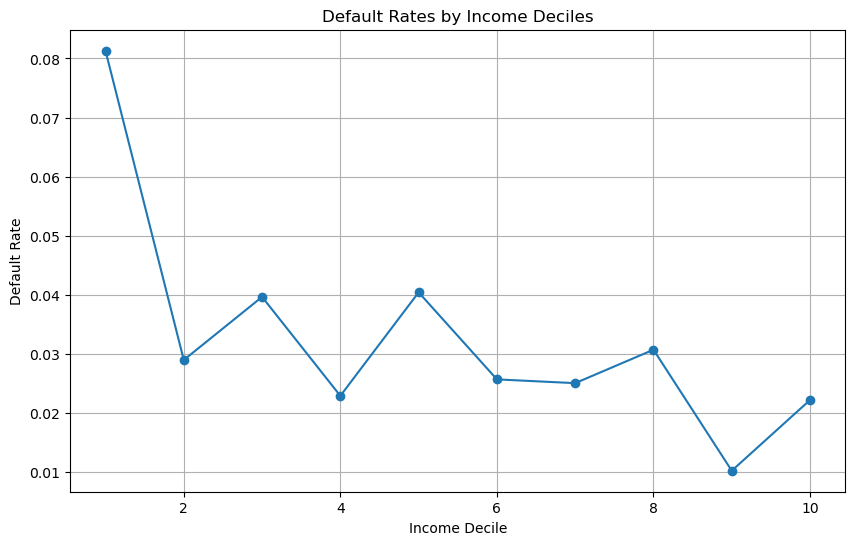

In [53]:
def plot_default_rates_by_income_deciles(df, score_column, nmi_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 10, labels=False) + 1
    default_rates = df.groupby('income_decile')['isFPD'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(default_rates['income_decile'], default_rates['isFPD'], marker='o')
    plt.title('Default Rates by Income Deciles')
    plt.xlabel('Income Decile')
    plt.ylabel('Default Rate')
    plt.grid(True)
    plt.show()
    
plot_default_rates_by_income_deciles(final_df, 'TUrs', 'hb2_nmi')

In [64]:
def create_income_decile_buckets_with_default_rate(df, nmi_column, fpd_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 20, labels=False) + 1
    income_stats = df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    income_stats_interval = df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
    result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
    return result

income_decile_stats = create_income_decile_buckets_with_default_rate(final_df, 'hb2_nmi', 'isFPD')
print("Income Decile Stats with Default Rates")
print(income_decile_stats)

Income Decile Stats with Default Rates
    income_decile      min        max  count_0  count_1        mean_0  \
0             1.0     2.17    1538.36     94.0     10.0   1321.472872   
1             2.0  1538.99    1932.00    132.0     10.0   1747.615985   
2             3.0  1932.52    2200.00    157.0      5.0   2069.654650   
3             4.0  2200.20    2447.00    178.0      5.0   2336.294270   
4             5.0  2447.84    2619.54    164.0      9.0   2551.193963   
5             6.0  2620.00    2816.71    175.0      5.0   2737.733257   
6             7.0  2817.73    3033.00    175.0      6.0   2941.557314   
7             8.0  3033.27    3206.72    166.0      2.0   3123.766205   
8             9.0  3209.36    3375.03    176.0      7.0   3288.539545   
9            10.0  3375.09    3553.56    180.0      8.0   3466.767000   
10           11.0  3555.66    3770.00    190.0      8.0   3658.960211   
11           12.0  3770.06    3999.00    189.0      2.0   3879.863862   
12          

In [65]:
correlation_matrix = final_df[['hb2_nmi',  'TUrs', 'bureau_score', 'isFPD']].corr()
print("Correlation Matrix")
correlation_matrix

Correlation Matrix


,hb2_nmi,TUrs,bureau_score,isFPD
hb2_nmi,1.000000,0.016919,0.031217,-0.023819
TUrs,0.016919,1.000000,0.002304,-0.059451
bureau_score,0.031217,0.002304,1.000000,-0.021436
isFPD,-0.023819,-0.059451,-0.021436,1.000000


#### No correlation strong enough - all are very weak  

# Excel

In [66]:
with pd.ExcelWriter('decile_stats.xlsx', engine='xlsxwriter') as writer:
    tu_decile_stats.to_excel(writer, sheet_name='TU Risk Score', index=False)
    bureau_decile_stats.to_excel(writer, sheet_name='Bureau Score', index=False)
    income_decile_stats.to_excel(writer, sheet_name='Income', index=False)
    
    workbook = writer.book
    header_format = workbook.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
    
    for sheet_name in ['TU Risk Score', 'Bureau Score', 'Income']:
        worksheet = writer.sheets[sheet_name]
        
        for col_num, value in enumerate(tu_decile_stats.columns.values):
            worksheet.write(0, col_num, value, header_format)
        
        worksheet.set_column('A:A', 12)
        worksheet.set_column('B:B', 12)
        worksheet.set_column('C:C', 15)
        worksheet.set_column('D:D', 15)
        worksheet.set_column('E:E', 15)
        worksheet.set_column('F:F', 15)
        worksheet.set_column('G:G', 12)
        worksheet.set_column('H:H', 12)
        
    for sheet_name in ['Income']:
        worksheet = writer.sheets[sheet_name]
        chart = workbook.add_chart({'type': 'column'})
        chart.add_series({
            'name': 'Default Rate', 'categories': [sheet_name, 1, 0, 10, 0],
            'values': [sheet_name, 1, 5, 10, 5]
        })
        
        chart.set_title({'name': 'Default Rate by Income'})
        chart.set_x_axis({'name': 'Income Decile'})
        chart.set_y_axis({'name': 'Default Rate (%)'})
        
        worksheet.insert_chart('M2', chart)
        
print("Excel Created Successfully")

Excel Created Successfully
